# Trabajo final Cluster AI - EDA 

#### Grupo 4 (Oyentes):
##### Julia Martinuzzi
##### Melina Rivero
##### Nicolás Sidicaro

El  presente análisis exhibe una proyección de delitos en base a los datos del 2016 a 2019 que se publican en el portal de datos del Gobierno de la Ciudad de Buenos Aires. A su vez, a fin de incorporar una dimensión que permita enriquecer dicha proyección se decidio incorporar una clasificación de los delitos por radio censal.Esto nos permitó obtener un mayor nivel de precisión sobre el análisis realizado.

### Análisis EDA

 #### Primero importamos las librerias que vamos a utilizar

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from  sklearn.metrics import silhouette_score

#### Segundo importamos los datos a analizar

In [9]:
delitos_2016 = pd.read_csv ("delitos_2016.csv")
delitos_2017 = pd.read_csv ("delitos_2017.csv")
delitos_2018 = pd.read_csv ("delitos_2018.csv")
delitos_2019 = pd.read_csv ("delitos_2019.csv")


#### Con los dataset ya importados vamos a proceder a explorarlos para determinar si necesitamos realizar algún cambio antes de realizar una unificación de los mismos. 
#### Para llevar a cabo esta primera exploración de los dataset utilizaremos la libreria numpy. 

#### Vamos a conocer la cantidad de filas y la cantidad de columnas que tienen nuestros dataset.

In [10]:
print("El dataset de delitos 2016 "+ str(np.shape(delitos_2016)[0]) + " filas y " + str(np.shape(delitos_2016)[1]) + " columnas")
print("El dataset de delitos 2017 "+ str(np.shape(delitos_2017)[0]) + " filas y " + str(np.shape(delitos_2017)[1]) + " columnas")
print("El dataset de delitos 2018 "+ str(np.shape(delitos_2018)[0]) + " filas y " + str(np.shape(delitos_2018)[1]) + " columnas")
print("El dataset de delitos 2019 "+ str(np.shape(delitos_2019)[0]) + " filas y " + str(np.shape(delitos_2019)[1]) + " columnas")

El dataset de delitos 2016 126583 filas y 10 columnas
El dataset de delitos 2017 120564 filas y 10 columnas
El dataset de delitos 2018 123733 filas y 10 columnas
El dataset de delitos 2019 117661 filas y 10 columnas


#### También vamos a necesitar conocer los nombres de las 10 columnas de cada uno de los dataset.  

In [11]:
delitos_2016.columns

Index(['id', 'fecha', 'franja_horaria', 'tipo_delito', 'subtipo_delito',
       'cantidad_registrada', 'comuna', 'barrio', 'lat', 'long'],
      dtype='object')

In [5]:
delitos_2017.columns

Index(['id', 'fecha', 'franja_horaria', 'tipo_delito', 'subtipo_delito',
       'cantidad_registrada', 'comuna', 'barrio', 'lat', 'long'],
      dtype='object')

In [6]:
delitos_2018.columns

Index(['id', 'fecha', 'franja_horaria', 'tipo_delito', 'subtipo_delito',
       'cantidad_registrada', 'comuna', 'barrio', 'lat', 'long'],
      dtype='object')

In [7]:
delitos_2019.columns

Index(['id', 'fecha', 'franja_horaria', 'tipo_delito', 'subtipo_delito',
       'cantidad_registrada', 'comuna', 'barrio', 'lat', 'long'],
      dtype='object')

#### Ahora visualizamos las primeras filas de los datasets

#### Delitos 2016

In [8]:
delitos_2016.head()

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
0,51585,2016-01-01,13,Robo (con violencia),NaN,1.0,9.0,Parque Avellaneda,-34.648730,-58.468536
1,83256,2016-01-01,22,Robo (con violencia),NaN,1.0,14.0,Palermo,-34.576925,-58.407400
2,117697,2016-01-01,1,Lesiones,Siniestro Vial,1.0,4.0,Parque Patricios,-34.645197,-58.401099
3,43088,2016-01-01,19,Hurto (sin violencia),NaN,1.0,9.0,Parque Avellaneda,-34.655760,-58.478681
4,68588,2016-01-01,4,Robo (con violencia),Robo Automotor,1.0,6.0,Caballito,-34.624128,-58.436826


#### Delitos 2017

In [9]:
delitos_2017.head()

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
0,178852,2017-01-01,12,Robo (con violencia),NaN,1.0,6.0,Caballito,-34.621410,-58.438432
1,132140,2017-01-01,6,Hurto (sin violencia),NaN,1.0,1.0,Monserrat,-34.615535,-58.370503
2,189963,2017-01-01,12,Robo (con violencia),NaN,1.0,4.0,Parque Patricios,-34.645709,-58.401704
3,204446,2017-01-01,14,Robo (con violencia),NaN,1.0,1.0,Constitución,-34.627859,-58.382804
4,178853,2017-01-01,16,Robo (con violencia),NaN,1.0,14.0,Palermo,-34.567318,-58.438099


#### Delitos 2018

In [10]:
delitos_2018.head()

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
0,269335,2018-01-01,23,Hurto (sin violencia),NaN,1.0,10.0,Vélez Sársfield,-34.624523,-58.502294
1,248498,2018-01-01,20,Hurto (sin violencia),Hurto Automotor,1.0,8.0,Villa Lugano,-34.669643,-58.464153
2,248172,2018-01-01,14,Hurto (sin violencia),Hurto Automotor,1.0,8.0,Villa Lugano,-34.680992,-58.465303
3,301417,2018-01-01,11,Robo (con violencia),NaN,1.0,13.0,Belgrano,-34.571114,-58.464845
4,272732,2018-01-01,22,Hurto (sin violencia),NaN,1.0,4.0,Barracas,-34.646857,-58.380158


#### Delitos 2019

In [11]:
delitos_2019.head()

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
0,374556,2019-01-01,12,Lesiones,Siniestro Vial,1.0,4.0,Nueva Pompeya,-34.648387,-58.404748
1,426152,2019-01-01,6,Robo (con violencia),NaN,1.0,9.0,Liniers,-34.649827,-58.513859
2,371604,2019-01-01,8,Lesiones,Siniestro Vial,1.0,15.0,Chacarita,-34.588108,-58.439392
3,425359,2019-01-01,16,Hurto (sin violencia),Hurto Automotor,1.0,10.0,Floresta,-34.631877,-58.483975
4,437571,2019-01-01,2,Robo (con violencia),Robo Automotor,1.0,4.0,Parque Patricios,-34.633161,-58.397123


#### De los resultados obtenidos, de la ejecución de los códigos anteriores, podemos determinar que no es necesario realizar ningún cambio para unir los dataset.

#### Para unir nuestros dataframe utilizamos, de la libreria pandas, la función de contatenar. Para obtener de esta manera un unico dataframe que contenga los delitos del 2016, 2017, 2018 y 2019.

In [12]:
delitos = pd.concat([delitos_2016, delitos_2017, delitos_2018, delitos_2019], axis=0)

#### Luego de realizado la unión de los dataset verificamos la cantidad de filas y columnas de nuestro nuevo dataframe que denominamos "delitos" y visualizamos las primeras y ultimas 5 filas

In [13]:
print("El dataframe delitos contiene "+ str(np.shape(delitos)[0]) + " filas y " + str(np.shape(delitos)[1]) + " columnas")

El dataframe delitos contiene 488541 filas y 10 columnas


In [14]:
delitos.head()

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
0,51585,2016-01-01,13,Robo (con violencia),NaN,1.0,9.0,Parque Avellaneda,-34.648730,-58.468536
1,83256,2016-01-01,22,Robo (con violencia),NaN,1.0,14.0,Palermo,-34.576925,-58.407400
2,117697,2016-01-01,1,Lesiones,Siniestro Vial,1.0,4.0,Parque Patricios,-34.645197,-58.401099
3,43088,2016-01-01,19,Hurto (sin violencia),NaN,1.0,9.0,Parque Avellaneda,-34.655760,-58.478681
4,68588,2016-01-01,4,Robo (con violencia),Robo Automotor,1.0,6.0,Caballito,-34.624128,-58.436826


In [15]:
delitos.tail()

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
117656,486770,2019-12-31,18,Robo (con violencia),Robo Automotor,1.0,8.0,Villa Riachuelo,-34.692347,-58.472299
117657,486678,2019-12-31,4,Robo (con violencia),Robo Automotor,1.0,5.0,Boedo,-34.626424,-58.422846
117658,486668,2019-12-31,1,Robo (con violencia),Robo Automotor,1.0,1.0,Monserrat,-34.615892,-58.370573
117659,486750,2019-12-31,14,Robo (con violencia),Robo Automotor,1.0,15.0,Villa Crespo,-34.602577,-58.433145
117660,486683,2019-12-31,7,Robo (con violencia),Robo Automotor,1.0,8.0,Villa Lugano,-34.674789,-58.466394


#### Ahora nos dispondremos a revisar aquellos valores faltantes para cada columna

In [14]:
col_nulls = delitos.isnull().sum().sort_values(ascending=False)
col_nulls

subtipo_delito         419364
long                     8364
lat                      8364
barrio                   8364
comuna                   8364
cantidad_registrada         0
tipo_delito                 0
franja_horaria              0
fecha                       0
id                          0
dtype: int64

### Transformación de nuestro datadrame
#### Antes de comenzar con el análisis y visualización del dataframe realizaremos algunos cambios a fin de eliminar aquellas columnas que no iremos a utilizar e incorporaremos aquellas que nos permitiran reducir el ruido. 

In [15]:
delitos= delitos.drop(['id'], axis=1)

#### Luego de eliminar la columna consultamos las primeras filas de nuestro dataframe

In [16]:
delitos.head()

,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
0,2016-01-01,13,Robo (con violencia),NaN,1.0,9.0,Parque Avellaneda,-34.648730,-58.468536
1,2016-01-01,22,Robo (con violencia),NaN,1.0,14.0,Palermo,-34.576925,-58.407400
2,2016-01-01,1,Lesiones,Siniestro Vial,1.0,4.0,Parque Patricios,-34.645197,-58.401099
3,2016-01-01,19,Hurto (sin violencia),NaN,1.0,9.0,Parque Avellaneda,-34.655760,-58.478681
4,2016-01-01,4,Robo (con violencia),Robo Automotor,1.0,6.0,Caballito,-34.624128,-58.436826


#### Creamos la columna "cantidad_delitos" con los datos, en formato de números enteros, de la columna "cantidad_registrada"

In [17]:
delitos['cantidad_delitos'] = delitos['cantidad_registrada'].astype(int)

#### También agregamos las columnas de año, mes, día, periodo y día de la semana

In [18]:
delitos['anio']= delitos['fecha'].str[:4]
delitos['mes']= delitos['fecha'].str[5:7]
delitos['dia']= delitos['fecha'].str[8:10]
delitos['periodo']= delitos['anio']+delitos['mes']

delitos['fecha'] = pd.to_datetime(delitos['fecha'])
delitos['dia_semana'] = delitos['fecha'].dt.day_name()

#### Por ultimo normalizamos la columna de barrio, para visualizar los resultados sin acentos y en mayúscula

In [19]:
delitos['barrio2']= delitos['barrio'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
delitos['barrio2']= delitos['barrio2'].str.upper()

#### Visualizamos nuestro dataframe luego de los cambios que hicimos

In [22]:
delitos.head()

,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long,cantidad_delitos,anio,mes,dia,periodo,dia_semana,barrio2
0,2016-01-01,13,Robo (con violencia),NaN,1.0,9.0,Parque Avellaneda,-34.648730,-58.468536,1,2016,01,01,201601,Friday,PARQUE AVELLANEDA
1,2016-01-01,22,Robo (con violencia),NaN,1.0,14.0,Palermo,-34.576925,-58.407400,1,2016,01,01,201601,Friday,PALERMO
2,2016-01-01,1,Lesiones,Siniestro Vial,1.0,4.0,Parque Patricios,-34.645197,-58.401099,1,2016,01,01,201601,Friday,PARQUE PATRICIOS
3,2016-01-01,19,Hurto (sin violencia),NaN,1.0,9.0,Parque Avellaneda,-34.655760,-58.478681,1,2016,01,01,201601,Friday,PARQUE AVELLANEDA
4,2016-01-01,4,Robo (con violencia),Robo Automotor,1.0,6.0,Caballito,-34.624128,-58.436826,1,2016,01,01,201601,Friday,CABALLITO


### Análisis y visualización

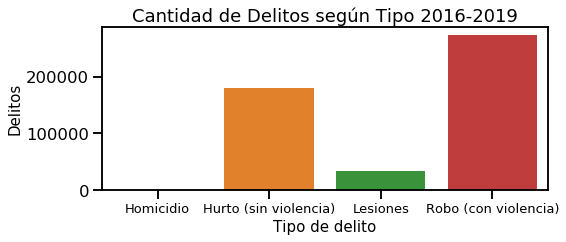

In [20]:
### Realizamos una pivot table de delitos según tipo
delitos_pivot_tipo = pd.pivot_table(delitos,values = 'cantidad_delitos', index = delitos.tipo_delito.values, aggfunc = np.sum)
delitos_pivot_tipo

# Realizamos un gráfico de barras para visualizar la cantidad de delitos segun tipo
sns.set_context("talk")
plt.figure(figsize=(8,3))
sns.barplot(x=delitos_pivot_tipo.index,y="cantidad_delitos", data=delitos_pivot_tipo)
plt.xticks(rotation=0, size = 13)
plt.title("Cantidad de Delitos según Tipo 2016-2019")
plt.xlabel('Tipo de delito', size = 15)
plt.ylabel('Delitos', size = 15)
plt.show()

##### Análisis de resultados de gráfico

En función de los resultados obtenidos encontramos que la mayor parte de los delitos ocurridos durante el período analizado fueron robos y hurtos, mientras que las lesiones (provenientes por lo general de siniestros viales) y homicidos tienen menor relevancia.
Para identificar la cantidad de homicidios incorporamos la siguiente tabla con los cruces de tipos de delitos y subtipos. 

In [22]:
delitos['subtipo_delito'] = delitos['subtipo_delito'].fillna('S/D')
delitos.groupby(['tipo_delito','subtipo_delito'], as_index=False).agg({"cantidad_registrada": "count"})


,tipo_delito,subtipo_delito,cantidad_registrada
0,Homicidio,Doloso,509
1,Homicidio,Siniestro Vial,509
2,Hurto (sin violencia),Hurto Automotor,22718
3,Hurto (sin violencia),S/D,157155
4,Lesiones,Siniestro Vial,34210
5,Robo (con violencia),Robo Automotor,11231
6,Robo (con violencia),S/D,262209


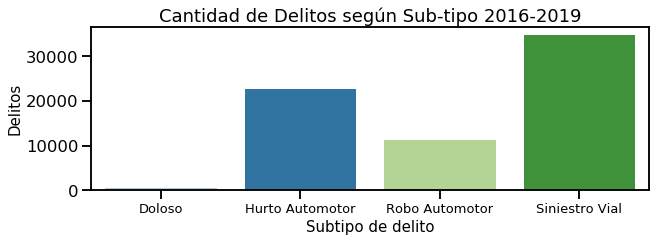

In [24]:
# Realizamos una pivot table de delitos según subtipo
delitos_pivot_subtipo = pd.pivot_table(delitos,values = 'cantidad_delitos', index = delitos.subtipo_delito.values, aggfunc = np.sum)
delitos_pivot_subtipo

# Realizamos un gráfico de barras para visualizar la cantidad de delitos segun subtipo
sns.set_context("talk")
plt.figure(figsize=(10,3))
sns.barplot(x=delitos_pivot_subtipo.index,y="cantidad_delitos", data=delitos_pivot_subtipo, palette= "Paired")
plt.xticks(rotation=0, size = 13)
plt.title("Cantidad de Delitos según Sub-tipo 2016-2019")
plt.xlabel('Subtipo de delito', size = 15)
plt.ylabel('Delitos', size = 15)
plt.show()

In [25]:
# Realizamos una pivot table para visualizar cuáles fueron las comunas con mayor cantidad de delitos
delitos_pivot_comuna = pd.pivot_table(delitos,values = 'cantidad_delitos', index = delitos.comuna.values, aggfunc = np.sum)
delitos_pivot_comuna = delitos_pivot_comuna.sort_values('cantidad_delitos', ascending=False)
delitos_pivot_comuna.head(5)

,cantidad_delitos
1.0,69208
3.0,42126
4.0,39462
14.0,38338
7.0,35157


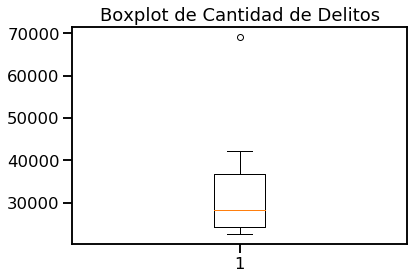

In [26]:
# Hacemos un boxplot para ver la distribución de los delitos en los comuna
plt.boxplot(delitos_pivot_comuna['cantidad_delitos'])
plt.title("Boxplot de Cantidad de Delitos")
plt.show()

In [27]:
# Vemos los estadísticos descriptivos de 'cantidad_delitos'
delitos_pivot_comuna['cantidad_delitos'].describe()

count       15.000000
mean     32014.200000
std      12138.965025
min      22510.000000
25%      24244.000000
50%      28335.000000
75%      36747.500000
max      69208.000000
Name: cantidad_delitos, dtype: float64

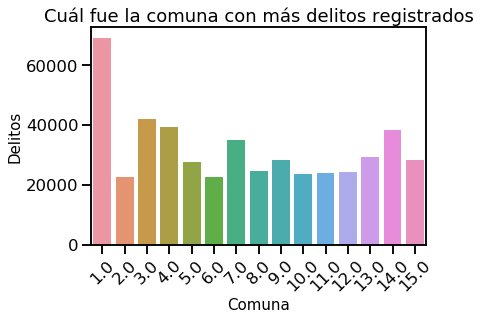

In [80]:
sns.set_context("talk")
az = sns.countplot(x="comuna", data=delitos)
plt.xlabel("Comuna", size = 15)
plt.ylabel("Delitos", size = 15)
plt.xticks(rotation=45)
plt.title("Cuál fue la comuna con más delitos registrados")
plt.show()

En el período analizado la comuna donde ocurrieron la mayor parte de los delitos fue la comuna 1 -compuesta por San Nicolás, Montserrat, San Telmo, Retiro, Constitución y Puerto Madero-. Entendemos que esta diferencia se explica en mayor medida por la concentración de oficinas y personas en el horario laboral en la zona centro de la Ciudad.
La sigue la comuna 3 y 4, zonas de menor poder adquisitivo y la comuna 14, donde se encuentra Palermo, siendo la comuna más poblada. 

In [29]:
# Realizamos una pivot table para visualizar los delitos por barrio
delitos_pivot_barrio = pd.pivot_table(delitos,values = 'cantidad_delitos', index = delitos.barrio2.values, aggfunc = np.sum)
delitos_pivot_barrio = delitos_pivot_barrio.sort_values('cantidad_delitos', ascending=False)
delitos_pivot_barrio.head()

,cantidad_delitos
PALERMO,38338
BALVANERA,33749
FLORES,24904
SAN NICOLAS,23411
RECOLETA,22565


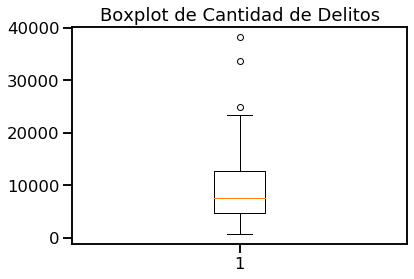

In [30]:
# Hacemos un boxplot para ver la distribución de los delitos en los barrios
plt.boxplot(delitos_pivot_barrio['cantidad_delitos'])
plt.title("Boxplot de Cantidad de Delitos")
plt.show()

In [31]:
# Vemos los estadísticos descriptivos de 'cantidad_delitos'
delitos_pivot_barrio['cantidad_delitos'].describe()

count       48.000000
mean     10004.437500
std       8202.662627
min        657.000000
25%       4697.750000
50%       7674.500000
75%      12677.000000
max      38338.000000
Name: cantidad_delitos, dtype: float64

#### De este primer análisis que realizamos podemos ver que el promedio de delitos por barrio, en el periodo analizado, es de apróximadamente 10.000.                                                                                                                                                                                      Sin embargo, hay una alta dispersión, ya que hay barrios que presentan niveles muy altos.

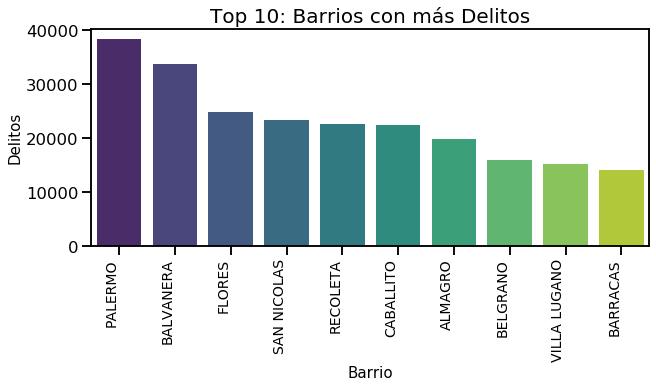

In [32]:
# Ahora realizamos un gráfico de barras para visualizar cuáles son los 10 barrios con más delitos
# top
top_n = 10
# Guardamos los indices de los top_n
idx_top = delitos_pivot_barrio[0:top_n]

plt.figure(figsize=(10,4))
# Indicamos la columna 'barrio' en el orden 'idx_top'
     
g = sns.barplot(x=idx_top.index,y="cantidad_delitos", data=idx_top,
                  palette = "viridis")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right", size = 14)
plt.title('Top 10: Barrios con más Delitos', size = 20)
plt.xlabel("Barrio", size = 15)
plt.ylabel("Delitos", size = 15)
plt.show()

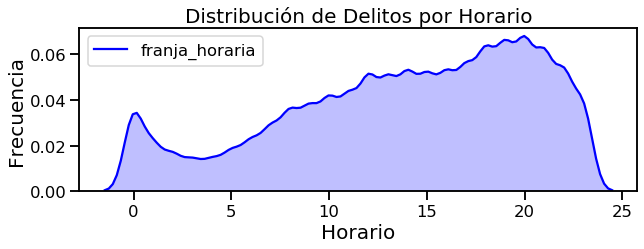

In [33]:
# Ahora vemos cómo es la distribución de los delitos por horario

# Primero eliminamos los registros que contienen 'S/D' en la variable 'franja_horaria'
delitos_hs = delitos.loc[(delitos['franja_horaria'] != 'S/D')]

plt.figure(figsize=(10,3))
sns.kdeplot(delitos_hs['franja_horaria'], color= "Blue", shade = True)
plt.xlabel("Horario",size = 20)
plt.ylabel("Frecuencia",size = 20)
plt.title('Distribución de Delitos por Horario',size = 20)
plt.show()

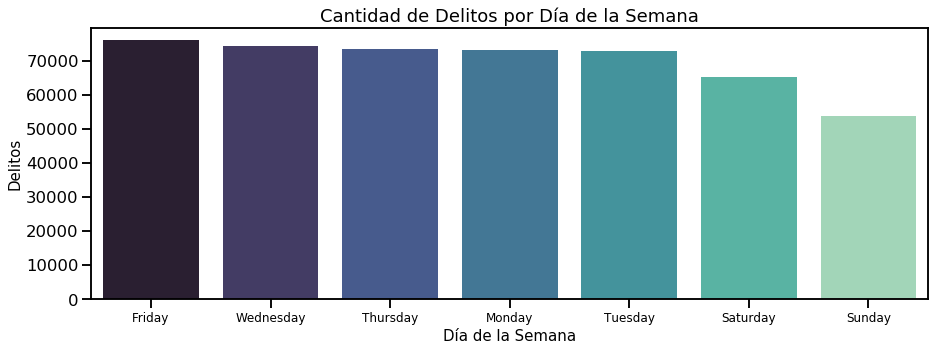

In [34]:
# Ahora realizamos otro gráfico para visualizar la distribución de los delitos por día de la semana

# Realizamos una pivot table de delitos según día de la semana
delitos_pivot_diasem = pd.pivot_table(delitos,values = 'cantidad_delitos', index = delitos.dia_semana.values, aggfunc = np.sum)
delitos_pivot_diasem = delitos_pivot_diasem.sort_values('cantidad_delitos', ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x=delitos_pivot_diasem.index,y="cantidad_delitos", data=delitos_pivot_diasem, palette="mako")
plt.xticks(rotation=0, size = 12)
plt.title("Cantidad de Delitos por Día de la Semana")
plt.xlabel('Día de la Semana', size = 15)
plt.ylabel('Delitos', size = 15)
plt.show()

Vemos que los fines de semana la cantidad de delitos es menor que durante los días de semana. Esto puede deberse a que la transitabilidad en la Ciudad durante la semana es mayor.

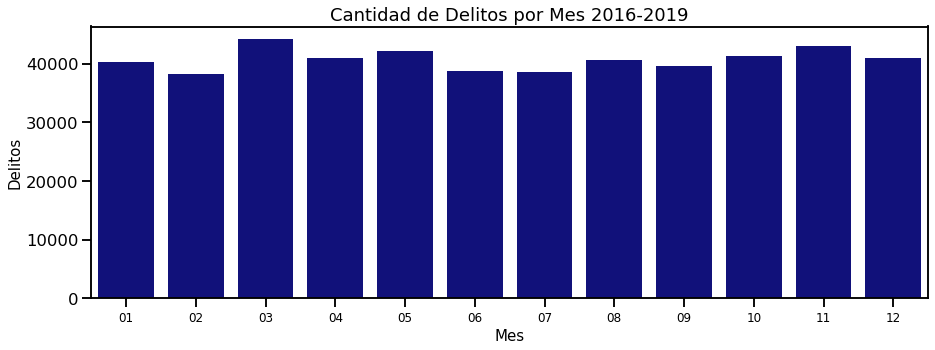

In [35]:
# Realizamos un gráfico de barras para visualizar los delitos por mes

# Realizamos una pivot table de delitos según mes
delitos_pivot_mes = pd.pivot_table(delitos,values = 'cantidad_delitos', index = delitos.mes.values, aggfunc = np.sum)
delitos_pivot_mes

plt.figure(figsize=(15,5))
sns.barplot(x=delitos_pivot_mes.index,y="cantidad_delitos", data=delitos_pivot_mes, color="darkblue")
plt.xticks(rotation=0, size = 12)
plt.title("Cantidad de Delitos por Mes 2016-2019")
plt.xlabel('Mes', size = 15)
plt.ylabel('Delitos', size = 15)
plt.show()

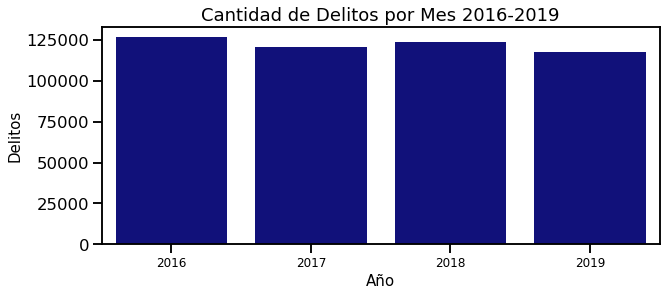

In [23]:
# Realizamos un gráfico de barras delitos según año

delitos_pivot_anio = pd.pivot_table(delitos,values = 'cantidad_delitos', index = delitos.anio.values, aggfunc = np.sum)
delitos_pivot_anio

plt.figure(figsize=(10,4))
sns.barplot(x=delitos_pivot_anio.index,y="cantidad_delitos", data=delitos_pivot_anio, color="darkblue")
plt.xticks(rotation=0, size = 12)
plt.title("Cantidad de Delitos por Mes 2016-2019")
plt.xlabel('Año', size = 15)
plt.ylabel('Delitos', size = 15)
plt.show()

Tanto a lo largo de los días, semanas, meses y años encontramos que los delitos se mantienen en niveles estables, por lo que no parece ser necesario incurrir en un análisis particular de alguno de ellos. 

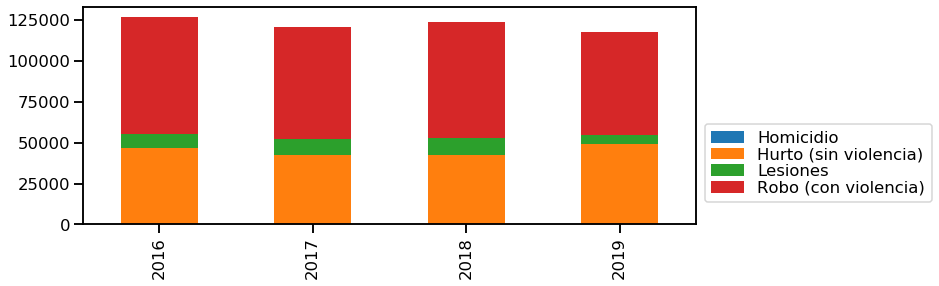

In [37]:
# Realizamos un gráfico de barras apiladas para ver la cantidad de delitos por año según tipo

delitos_pivot_anio_tipo = pd.pivot_table(delitos,values = 'cantidad_delitos', columns= "tipo_delito",index = delitos.anio.values, aggfunc = np.sum)
delitos_pivot_anio_tipo

ax=delitos_pivot_anio_tipo.plot.bar(stacked=True, figsize=(11,4))
ax.legend(loc='best', labelspacing=0.1, bbox_to_anchor=(1, 0.5))

#### Observamos, de esta manera que para todos los años, los tipos de delito más frecuentes son "Robo (con violencia)" y "Hurto (sin violencia)"

In [38]:
# Importamos dataset de población por barrio
poblacion = pd.read_csv('caba_pob_barrios_2010.csv')
# Normalizamos para convertir la ñ en n
poblacion['BARRIO']= poblacion['BARRIO'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

poblacion = poblacion.set_index('BARRIO')
poblacion.head()

,POBLACION
BARRIO,
AGRONOMIA,13912
ALMAGRO,131699
BALVANERA,138926
BARRACAS,89452
BELGRANO,126267


In [39]:
np.shape(poblacion)

(48, 1)

In [40]:
# Hacemos el join de cantidad de delitos y población por barrio
poblacion_delitos = poblacion.join(delitos_pivot_barrio)
poblacion_delitos.head()

,POBLACION,cantidad_delitos
BARRIO,,
AGRONOMIA,13912,1897
ALMAGRO,131699,19869
BALVANERA,138926,33749
BARRACAS,89452,14132
BELGRANO,126267,16027


In [41]:
# Agregamos una columna para ver la incidencia de delitos por barrio: delitos/población
poblacion_delitos['delitos/poblacion']= poblacion_delitos['cantidad_delitos']/poblacion_delitos['POBLACION']
poblacion_delitos.head()

,POBLACION,cantidad_delitos,delitos/poblacion
BARRIO,,,
AGRONOMIA,13912,1897,0.136357
ALMAGRO,131699,19869,0.150867
BALVANERA,138926,33749,0.242928
BARRACAS,89452,14132,0.157984
BELGRANO,126267,16027,0.126929


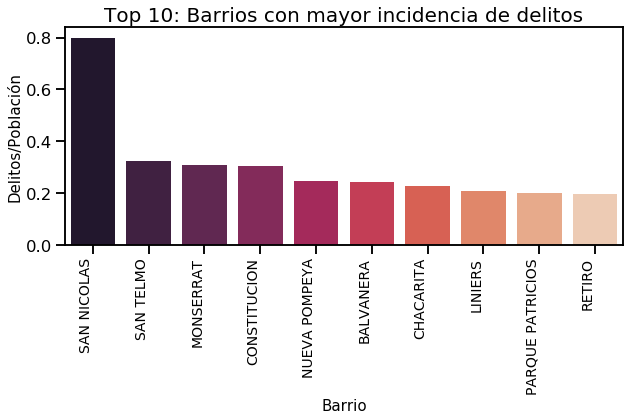

In [42]:
poblacion_delitos_sorted = poblacion_delitos.sort_values('delitos/poblacion', ascending=False)
# top
top_n = 10
# Guardamos los indices de los top_n
idx_top = poblacion_delitos_sorted[0:top_n]

plt.figure(figsize=(10,4))

     
g = sns.barplot(x=idx_top.index,y="delitos/poblacion", data=idx_top,
                  palette = "rocket")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right", size = 14)
plt.title('Top 10: Barrios con mayor incidencia de delitos', size = 20)
plt.xlabel("Barrio", size = 15)
plt.ylabel("Delitos/Población", size = 15)
plt.show()

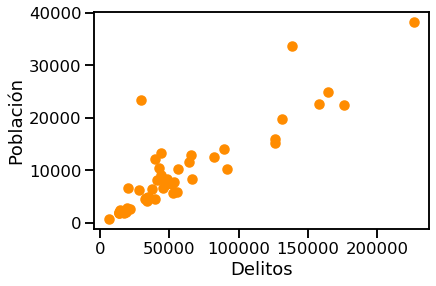

In [43]:
# Vemos si existe una correlación entre cantidad de delitos y población
# Visualizamos los datos en un scatterplot
plt.scatter(poblacion_delitos['POBLACION'],poblacion_delitos['cantidad_delitos'],color="darkorange")
plt.xlabel('Delitos')
plt.ylabel('Población')
plt.show()